In [16]:
%matplotlib inline

In [17]:
import pandas as pd

# 1. 前処理
## 1.1. データの読み込み

In [18]:
each_df = []
for i in range(1, 21):  # 被験者番号1〜21
    filename = 'sampledata/result' + str(i) + '.csv'
    each_df.append(pd.read_csv(filename))
    raw = pd.concat(each_df)  # 縦に結合していく
raw.head()

,ink,text,subj,RT
0,B,緑,1,415
1,B,緑,1,415
2,B,赤,1,530
3,G,緑,1,1305
4,R,青,1,425


In [19]:
raw.shape  # 9条件 * 20名 * 繰り返し6回 = 1080行

(1080, 4)

## 1.2. 外れ値処理

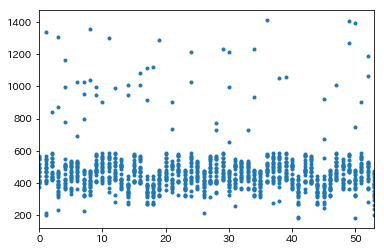

In [20]:
raw['RT'].plot(style='.')  # ところどころ欠損値が含まれているようである

In [21]:
#　平均±1.5SDを越えるものを分析から除外したい
m = raw['RT'].mean()
e = raw['RT'].std()
is_outlier = (raw['RT'] >= m + 1.5 * e) | (raw['RT'] <= m - 1.5 * e)  # 外れ値はTrueになる
raw = raw.loc[~is_outlier, :]  # チルダをつけると，TrueとFalseが逆転する

In [22]:
# 反応時間が200msを下回るものも分析から除外したい
is_outlier = raw['RT'] < 200
raw = raw.loc[~is_outlier, :]

In [23]:
raw.shape  # 欠損値が除外され，データ総数が減った

(1020, 4)

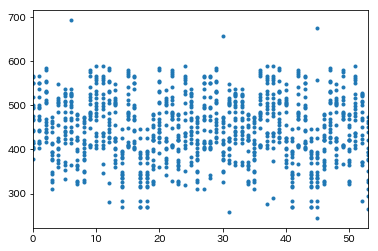

In [24]:
raw['RT'].plot(style='.')  # ブレ幅が減った

## 1.3. 一致 / 不一致条件の追加

In [25]:
congruency = ((raw['ink'] == 'R') & (raw['text'] == '赤') |
              (raw['ink'] == 'G') & (raw['text'] == '緑') |
              (raw['ink'] == 'B') & (raw['text'] == '青'))

In [26]:
congruency.replace((True, False), ('congruent', 'incongruent'), inplace=True)

In [27]:
raw['congruency'] = congruency
raw.head(12)  # 色が一致している条件はcongruent

,ink,text,subj,RT,congruency
0,B,緑,1,415,incongruent
1,B,緑,1,415,incongruent
2,B,赤,1,530,incongruent
4,R,青,1,425,incongruent
5,R,緑,1,536,incongruent
6,R,緑,1,536,incongruent
8,G,緑,1,402,congruent
10,G,赤,1,557,incongruent
11,G,赤,1,557,incongruent
13,R,青,1,425,incongruent


## データの集計
### congruency条件ごとに

In [29]:
# groupbyで，subj, congruency (各被験者・各条件) ごとに反応時間を平均できる．
df = raw.groupby(by=['subj', 'congruency']).mean()
df.head()

RT
subj congruency             
1    congruent    375.800000
     incongruent  479.125000
2    congruent    380.000000
     incongruent  492.852941
3    congruent    387.875000

In [32]:
# as_index=Falseで，インデックス化せずに集計できる．今回はこちらを．
df = raw.groupby(by=['subj', 'congruency'], as_index=False).mean()
df.head()

,subj,congruency,RT
0,1,congruent,375.800000
1,1,incongruent,479.125000
2,2,congruent,380.000000
3,2,incongruent,492.852941
4,3,congruent,387.875000


In [33]:
# 整形できたデータを保存しておく．
df.to_csv('result_congruency.csv', index=False)

### ink × text条件で

In [35]:
df = raw.groupby(by=['subj', 'ink', 'text'], as_index=False).mean()
df.head()

,subj,ink,text,RT
0,1,B,緑,415.0
1,1,B,赤,530.0
2,1,B,青,372.0
3,1,G,緑,453.0
4,1,G,赤,557.0


In [36]:
df.to_csv('result_color.csv', index=False)